In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('C:\\Users\\Admin\\OneDrive\\Desktop\\New folder (2)\\NYC Taxi Data.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
df.drop(['pickup_datetime','dropoff_datetime','id','vendor_id'],axis=1,inplace=True )

In [5]:
df

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...
1458639,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [6]:
df.trip_duration.unique()

array([  455,   663,  2124, ..., 11513, 72504,  6124], dtype=int64)

In [7]:
df.isnull().sum()

passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

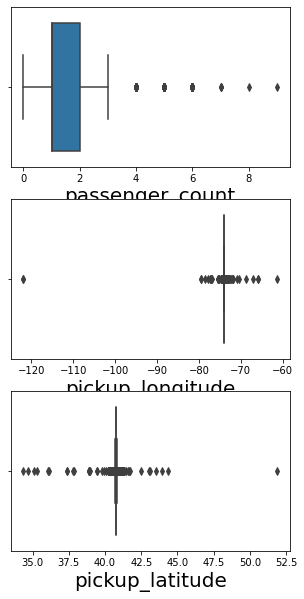

In [8]:
box=df[['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_duration']]
plt.figure(figsize=(5,10), facecolor='white')
plotnumber = 1
for column in box:
    if plotnumber<=3 : 
        ax = plt.subplot(3,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1

In [9]:
df.store_and_fwd_flag.value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [10]:
df.loc[df['store_and_fwd_flag']=='N','store_and_fwd_flag']=1
df.loc[df['store_and_fwd_flag']=='Y','store_and_fwd_flag']=0

In [11]:
df.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,1,-73.982155,40.767937,-73.964630,40.765602,1,455
1,1,-73.980415,40.738564,-73.999481,40.731152,1,663
2,1,-73.979027,40.763939,-74.005333,40.710087,1,2124
3,1,-74.010040,40.719971,-74.012268,40.706718,1,429
4,1,-73.973053,40.793209,-73.972923,40.782520,1,435


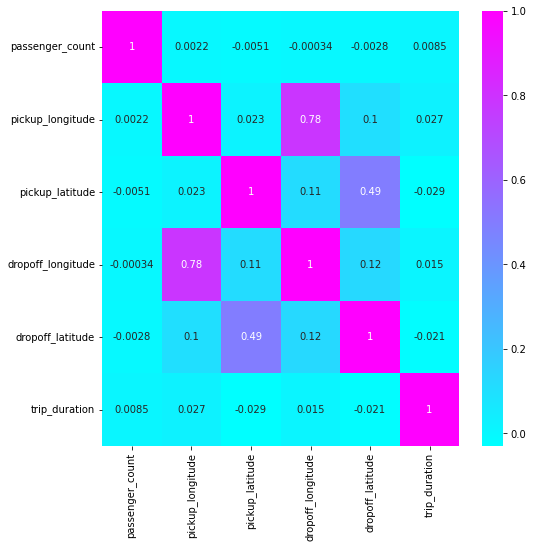

In [12]:
#feature Selection
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='cool')
plt.show()

In [13]:
df.describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [14]:
df.duplicated().sum()

9

In [15]:
## Definig independent and dependent variables
X = df.drop(['trip_duration'], axis = 1)
y = df['trip_duration']

In [16]:
# Definiging training and testing data, on training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(1166915, 6)

In [18]:
X_test.shape

(291729, 6)

In [19]:
from sklearn.linear_model import LinearRegression ## Model import
Lin_reg = LinearRegression() 
Lin_reg.fit(X_train, y_train) 

LinearRegression()

In [20]:
y_train_predict=Lin_reg.predict(X_train)

In [21]:
y_train_predict

array([1096.19466858,  843.06127638,  798.22653924, ...,  839.38129772,
        873.65711098, 1140.77199041])

In [22]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
train_score=r2_score(y_train,y_train_predict) #r2 score for training data
print("The Training Accuracy is :",train_score*100,'%')

The Training Accuracy is : 0.15616913178857494 %


In [23]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-((1-train_score)*(1069-1))/(1069-8-1)
print("The Adjusted r2 Accuracy is: ",(train_adjusted_r2*100),"%")

The Adjusted r2 Accuracy is:  -0.5973692143866005 %


In [24]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [25]:
model1 = smf.ols("trip_duration~passenger_count+pickup_longitude+pickup_latitude+dropoff_longitude+dropoff_latitude+store_and_fwd_flag",data = df).fit()

In [26]:
model1.params

Intercept                  364476.126444
store_and_fwd_flag[T.1]       -91.470645
passenger_count                32.955013
pickup_longitude             2578.768826
pickup_latitude             -3699.730070
dropoff_longitude            -635.253298
dropoff_latitude            -1691.813662
dtype: float64

In [27]:
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     436.2
Date:                Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:29:35   Log-Likelihood:            -1.4560e+07
No. Observations:             1458644   AIC:                         2.912e+07
Df Residuals:                 1458637   BIC:                         2.912e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                3.645e+05   8133.087     44.814      0.000    3.49e+05     3.8e+05
store_and_fwd_flag[T.1]   -91.4706     58.523     -1.563      0.118    -206.174      23.232
passenger_count            32.9550      3.298      9.994      0.000      26.492      39.418
pickup_longitude         2578.7688     99.166     26.005      0.000    2384.407    2773.131
pickup_latitude         -3699.7301    153.089    -24.167      0.000   -3999.780   -3399.680
dropoff_longitude        -635.2533     99.949     -6.356      0.000    -831.150    -439.357
dropoff_latitude        -1691.8137    139.586    -12.120      0.000   -1965.397   -1418.231
================================================================================
Omnibus:                  8290086.317   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   2255840751718964.500
Skew:                         343.877   Prob(JB):                           0.00
Kurtosis:                  192658.946   Cond. No.                       2.24e+05
================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""